In [42]:
import numpy as np
import matplotlib.pyplot as plt
import sys
import cv2

sys.path.append("/home/ubuntu/workspace/ship_detection")

from src.utils.raster_utils import convert_img_to_np


## Check train data

In [44]:
train_img_path = "/home/ubuntu/workspace/ship_detection/dataset/JPEGImages/01.jpg"

In [45]:
train_img = cv2.imread(train_img_path)
train_img = cv2.cvtColor(train_img, cv2.COLOR_BGR2RGB)
# img_np_log = np.log(train_img + 1e-6)

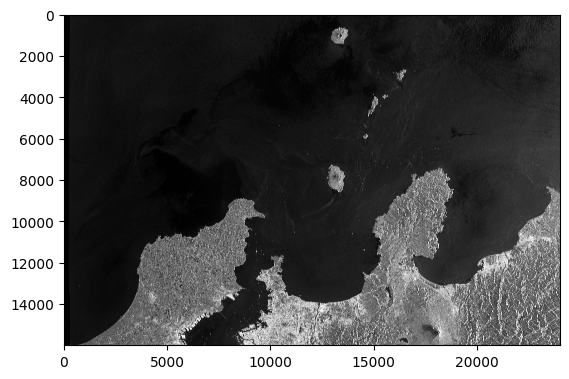

In [49]:
plt.imshow(train_img)

In [50]:
max_num = train_img.max()
min_num = train_img.min()
per_95 = np.percentile(train_img[:, :, 0].flatten(), 95)
per_5 = np.percentile(train_img[:, :, 0].flatten(), 5)

print(f"Max: {max_num}")
print(f"Min: {min_num}")
print(f"95 percentile: {per_95}")
print(f"5 percentile: {per_5}")

Max: 255
Min: 0
95 percentile: 177.0
5 percentile: 4.0


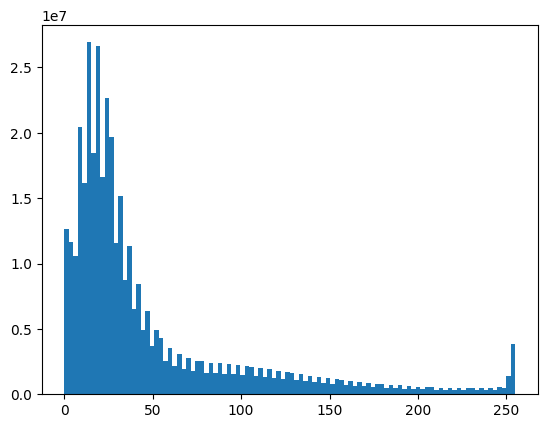

In [51]:
plt.hist(train_img[:, :, 0].flatten(), bins=100)
plt.show()

## Check test data

In [68]:
original_img_path = "/home/ubuntu/workspace/ship_detection/dataset/inference/2022-08-27_sentinel1.tiff"

In [69]:
img_np = convert_img_to_np(original_img_path, [0, 1, 2]).transpose(1, 2, 0)
img_np_log = np.log(img_np + 1e-6)

In [70]:
max_num = img_np_log.max()
min_num = img_np_log.min()
per_95 = np.percentile(img_np_log[:, :, 0].flatten(), 95)
per_5 = np.percentile(img_np_log[:, :, 0].flatten(), 5)

print(f"Max: {max_num}")
print(f"Min: {min_num}")
print(f"95 percentile: {per_95}")
print(f"5 percentile: {per_5}")

Max: 9.270489692687988
Min: -13.815510749816895
95 percentile: 0.39410707056522304
5 percentile: -4.742604804039002


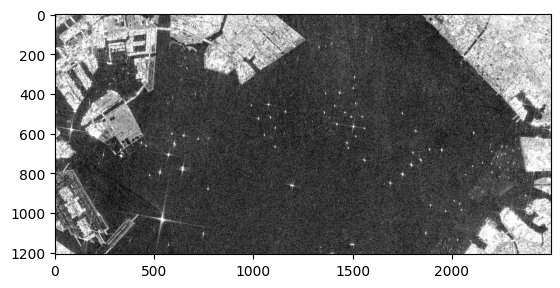

In [86]:
plt.imshow((np.clip(img_np_log, per_5, per_95) - per_5) / (per_95 - per_5))

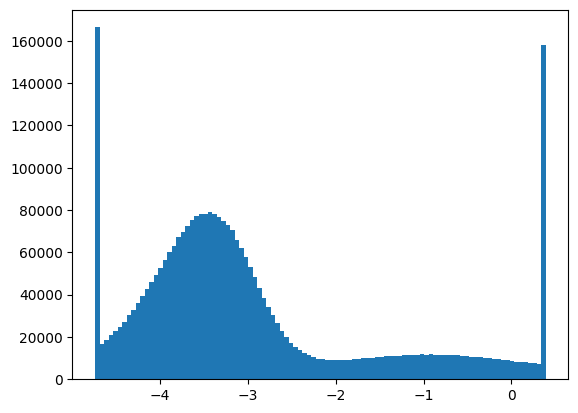

In [85]:
img_np_clip = np.clip(img_np_log, per_5, per_95)
plt.hist((img_np_clip[:, :, 0]).flatten(), bins=100)
plt.show()